# Semana 1: Árboles de Decisión

In [3]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: module://matplotlib_inline.backend_inline
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Predicción de valores continuos con regresión lineal

### Estimación del modelo mediante mínimos cuadrados

In [4]:
def stepGradient(par, x, y, learningRate):
    b_0_gradient = 0
    b_1_gradient = 0
    N = float(len(x))
    
    for i in range(0, len(x)):
        b_0_gradient += (2/N) *        (y[i] - (par[0] + par[1] * x[i]))
        b_1_gradient += (2/N) * x[i] * (y[i] - (par[0] + par[1] * x[i]))
        
    new_b_0 = par[0] + (learningRate * b_0_gradient)
    new_b_1 = par[1] + (learningRate * b_1_gradient)
    
    return [new_b_0, new_b_1]

def fitGradient(par, x, y, learningRate, maxDifference = 1e-6, maxIter = 30):
    prev_step = par[:]
    num_iter = 0;
    
    num_iter += 1
    results = stepGradient(prev_step, trX, trY, learningRate)   
    difference = abs(prev_step[0] - results[0]) + abs(prev_step[1] - results[1])

    while ((difference > maxDifference) & (num_iter < maxIter)):
        num_iter += 1
        prev_step = results
        results = stepGradient(prev_step, trX, trY, learningRate)    
        difference = abs(prev_step[0] - results[0]) + abs(prev_step[1] - results[1])

    return results

trX = np.linspace(-2, 2, 101)
trY = 3 + 2 * trX + np.random.randn(*trX.shape) * 0.33

print(fitGradient([1,1], trX, trY, 0.05))

[np.float64(2.8605410488471406), np.float64(2.0240431550883966)]


Se puede representar gráficamente la función del gradiente descendiente

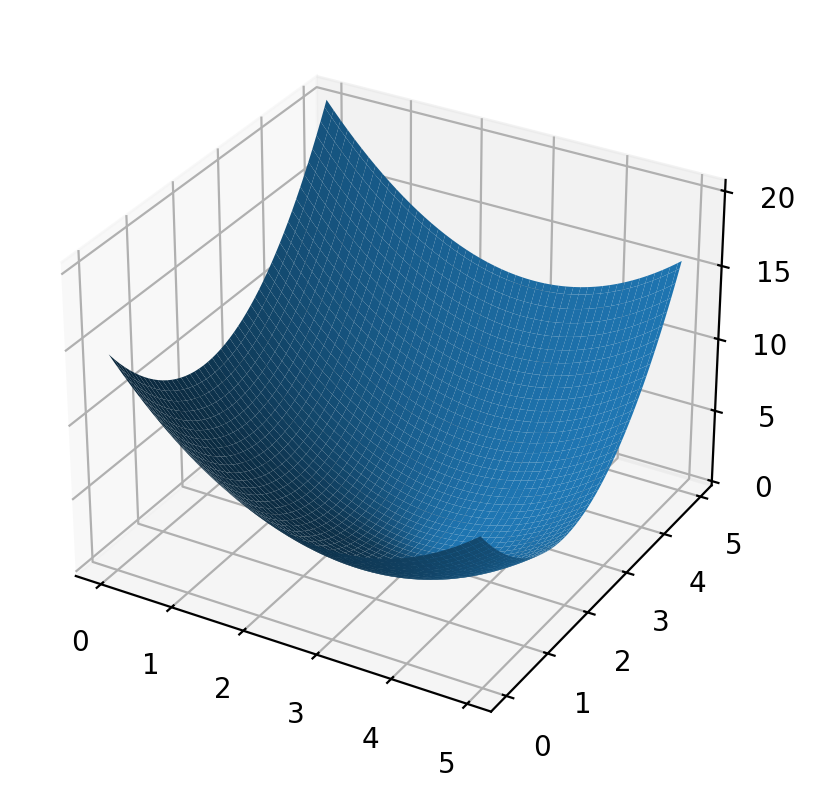

In [5]:
from mpl_toolkits.mplot3d import Axes3D

def computeLinealRegressionError(b0, b1, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (b0 + b1 * x[i])) ** 2
    return totalError / float(len(x))

b_0 = np.arange(0, 5, 0.05)
b_1 = np.arange(0, 5, 0.05)
X, Y = np.meshgrid(b_0, b_1)
    
zs = np.array([computeLinealRegressionError(x, y, trX, trY) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

figure().add_subplot(111, projection = '3d').plot_surface(X, Y, Z)

### Regresión lineal con de scikit-learn
En `scikit-learn` los modelos de regresión lineal se implementa con la clase `LinearRegression`. En el siguiente ejemplo se muestra los pasos necesarios para conseguir una regresión lineal.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
 
# Conjunto de datos
x = [[80], [79], [83], [84], [78], [60], [82], [85], [79], [84], [80], [62]]
y = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Creación del modelo
model = LinearRegression()
model.fit(x, y)

# Obtención de estimaciones
print('Con 70 horas la producción sería:', model.predict([[70]]))
print

# Predicción del modelo
y_pred = model.predict(x);

# Obtención de los parametros de ajuste
print('w_0', model.intercept_[0])
print('w_1', model.coef_[0][0])

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y))
print('Error absoluto medio', mean_absolute_error(y_pred, y))
print('Mediana del error absoluto', median_absolute_error(y_pred, y))

Con 70 horas la producción sería: [[274.87943262]]
w_0 31.74113475177313
w_1 3.4734042553191484
R^2 0.9101048533632331
Error cuadrático medio 74.67789598108753
Error absoluto medio 7.517730496453903
Mediana del error absoluto 6.792553191489375


Para representar el modelo de forma gráfica se puede utilizar las siguientes lineas de codigo:

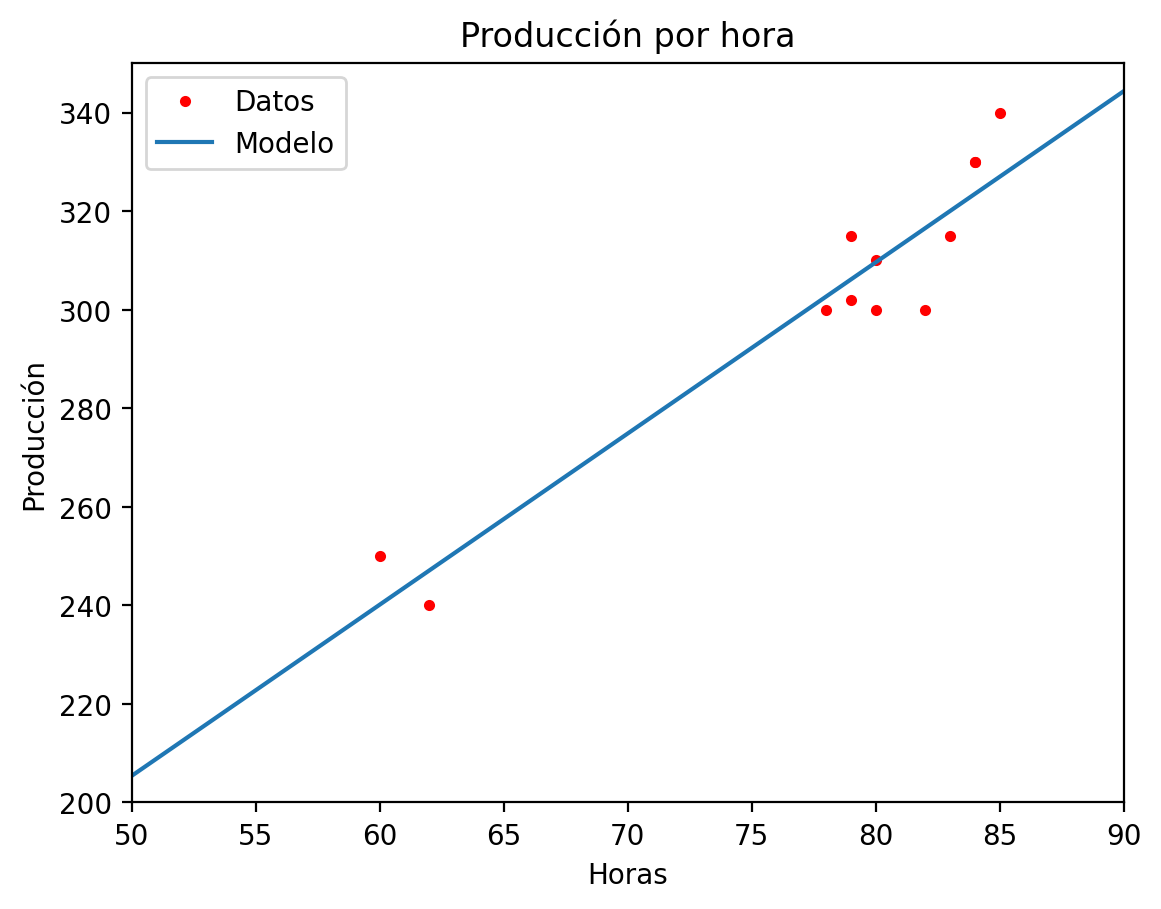

In [7]:
x_p = [[50], [350]]
y_p = model.predict(x_p)

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_p, label = 'Modelo')

title(u'Producción por hora')
xlabel('Horas')
ylabel(u'Producción')
axis([50, 90, 200, 350])

legend(loc = 2)

Al analizar los resultados de este ajuste se puede observar que el término independiente es mayor que cero. Teniendo en cuenta que el modelo utilizado es de la forma:
$$y=w_0+w_1x$$
 
Esto índica que el modelo implementado no realiza una estimación correcta cuando se trabajan 0 horas, ya que en este caso la producción esperada sería igual al valor del término independiente. La solución de este problema se puede obtener haciendo un modelo en el que no exista término independiente.

In [8]:
# Modelo sin término de independiente
model_ni = LinearRegression(fit_intercept = False)
model_ni.fit(x, y)

# Obtención de estimaciones
print('Con 70 horas la producción sería:', model_ni.predict([[70]])[0])
print

# Obtención de los parametros de ajuste
print('w_0', model_ni.intercept_)
print('w_1', model_ni.coef_[0][0])
print('R^2', model_ni.score(x, y))

Con 70 horas la producción sería: [271.3335141]
w_0 0.0
w_1 3.8761930585683295
R^2 0.8977400845135437


Una forma de comparar la validez de los dos modelos es mediante la representación grafica de las predicciones de ambos y los datos en una misma figura.

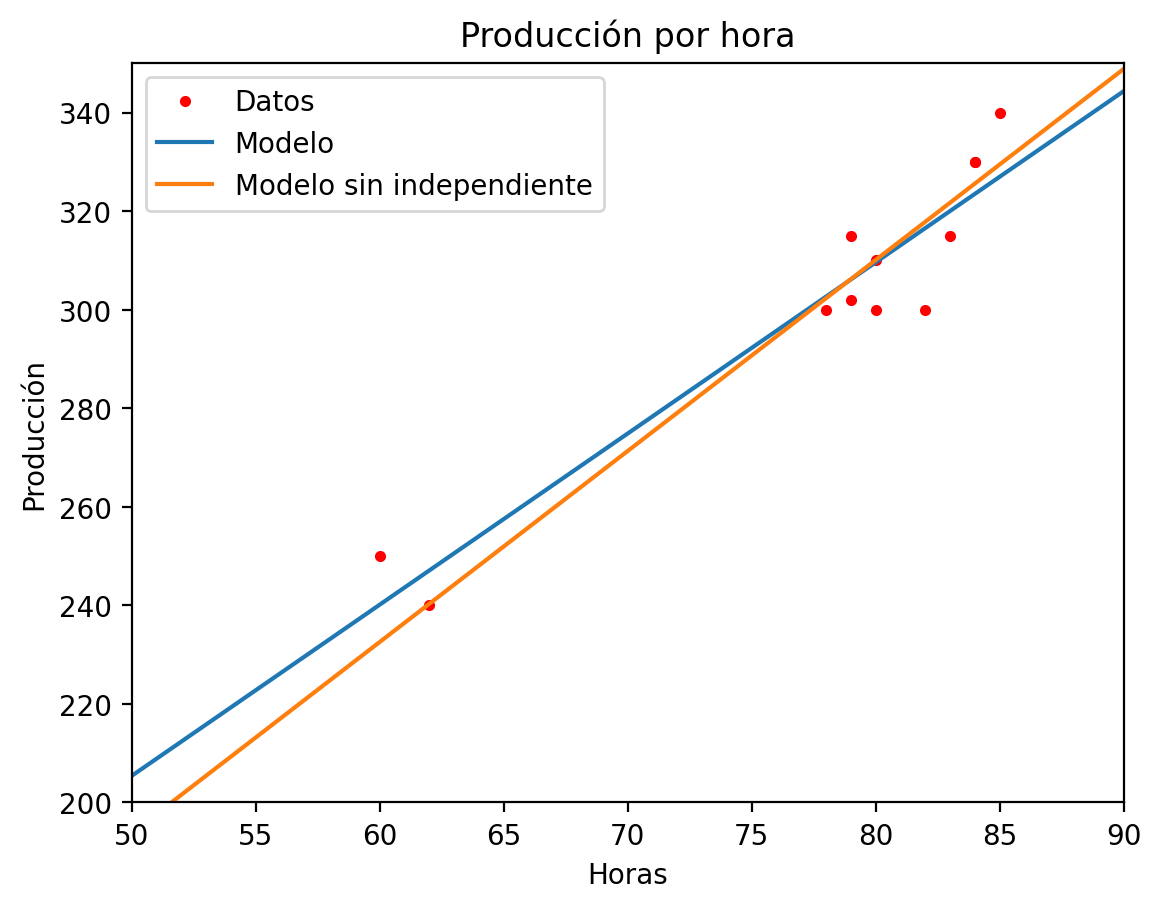

In [9]:
x_p = [[50], [350]]
y_p = model.predict(x_p)

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_p, label = 'Modelo')
plot(x_p, model_ni.predict(x_p), label = 'Modelo sin independiente')

title(u'Producción por hora')
xlabel('Horas')
ylabel(u'Producción')
axis([50, 90, 200, 350])

legend(loc = 2)

### Regresión lineal múltiple

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 2, include_bias = False)
x_2     = poly_2.fit_transform(x)

model_2 = LinearRegression(fit_intercept = False)
model_2.fit(x_2, y)

# Obtención de los parametros de ajuste
print('w_1', model_2.coef_[0][0])
print('w_2', model_2.coef_[0][1])
print('R^2', model_2.score(x_2, y))

w_1 4.3166820435043105
w_2 -0.005542891455553235
R^2 0.907592703066626


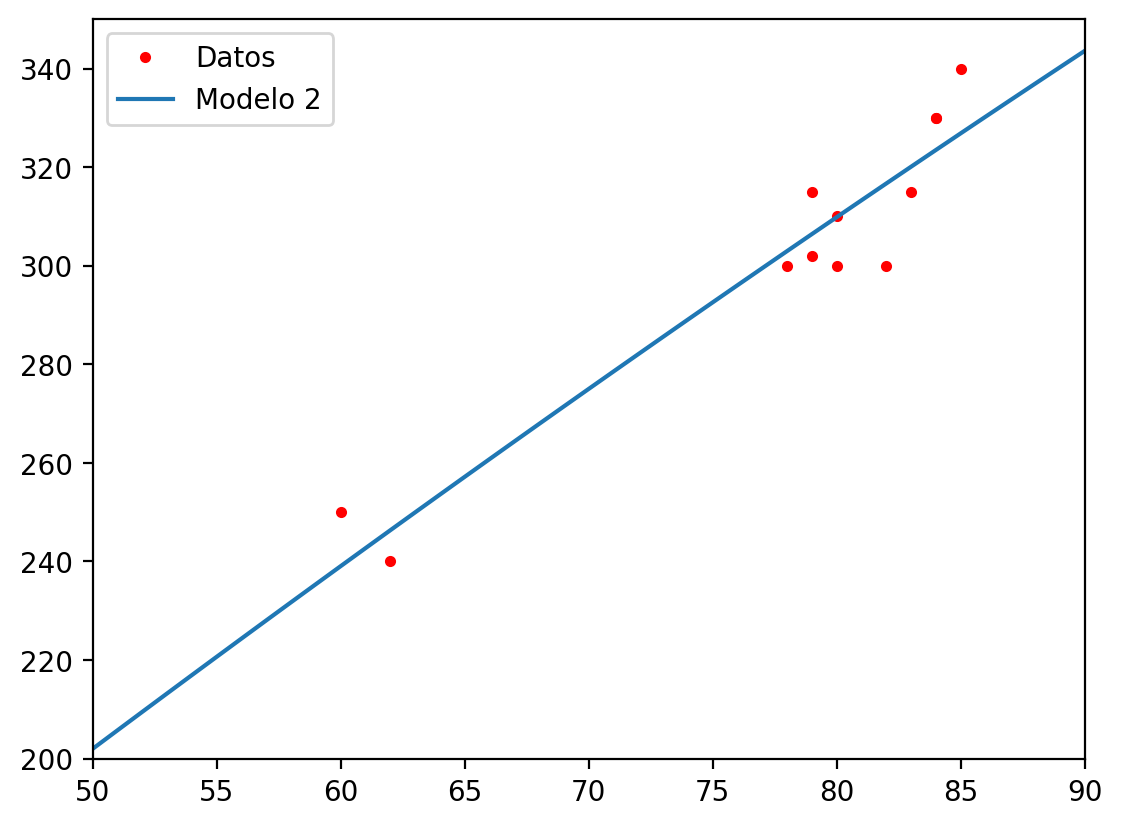

In [11]:
x_p = [[i] for i in range(50, 91)]
y_2 = model_2.predict(poly_2.fit_transform(x_p))

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_2, label = 'Modelo 2')
axis([50, 90, 200, 350])
legend(loc = 2)

Las predicciones del modelo basado en un polinomio de grado dos parecen mejores que los resultados obtenidos con el modelo lineal. Se puede repetir el ejercicio con un polinomio de grado 5.

In [10]:
# Polinomio de grado 5
poly_5  = PolynomialFeatures(degree = 5, include_bias= False)
x_5     = poly_5.fit_transform(x)
model_5 = LinearRegression(fit_intercept = False)
model_5.fit(x_5, y)

print("Modelo 1 - R^2:", model_ni.score(x, y))
print("Modelo 2 - R^2:", model_2.score(x_2, y))
print("Modelo 5 - R^2:", model_5.score(x_5, y))

Modelo 1 - R^2: 0.8977400845135437
Modelo 2 - R^2: 0.907592703066626
Modelo 5 - R^2: 0.9690515843543286


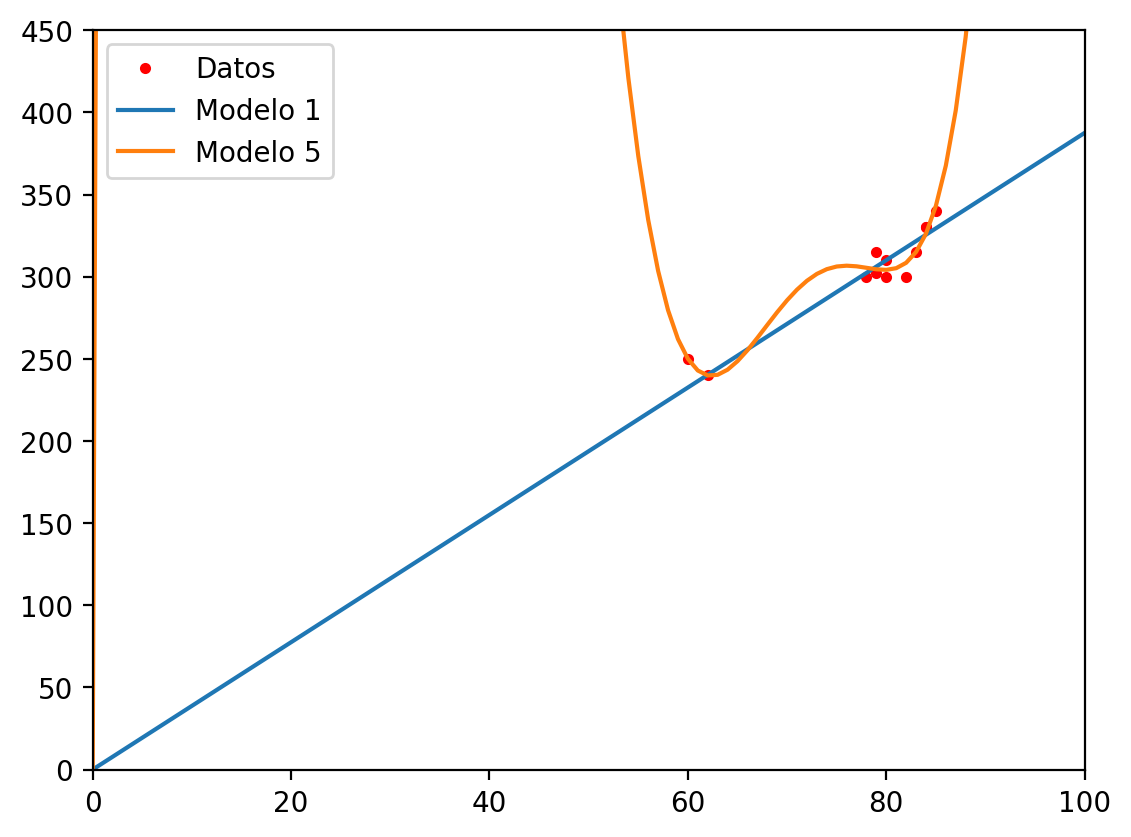

In [11]:
x_p = [[i] for i in range(0, 101)]
y_1 = model_ni.predict(x_p)
y_5 = model_5.predict(poly_5.fit_transform(x_p))

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_1, label = 'Modelo 1')
plot(x_p, y_5, label = 'Modelo 5')

axis([0, 100, 0, 450])
legend(loc = 2)

### Validación cruzada

In [12]:
#from sklearn.datasets import load_boston

# Importación de los datos de vivienda de Boston
#boston  = load_boston()

import pandas as pd
import numpy as np


#data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv('/Users/frankmosquera/Desktop/Franklin/Maestria UDLA Machine Learning/MODULO 3/CODIGO_TEORIA/boston.csv', sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Creación de un modelo 
#model_boston = LinearRegression()
#model_boston.fit(boston.data, boston.target)

#print("R^2:", model_boston.score(boston.data, boston.target))


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target)

# Creación de un modelo
model = LinearRegression()
model.fit(x_train, y_train)

predit_train = model.predict(x_train)
predit_test = model.predict(x_test)

# Evaluación de R2
print('R2 en entrenamiento es: ', model.score(x_train, y_train))
print('R2 en validación es: ', model.score(x_test, y_test))

R2 en entrenamiento es:  0.7602500718124922
R2 en validación es:  0.5861345594275948


### Variables Categóricas

In [15]:
import pandas as pd

# Conjunto de datos con las factorias
x = [[80, 'Factoria 1'], [79, 'Factoria 2'], [83, 'Factoria 3'],
     [84, 'Factoria 1'], [78, 'Factoria 2'], [60, 'Factoria 3'],
     [82, 'Factoria 1'], [85, 'Factoria 2'], [79, 'Factoria 3'],
     [84, 'Factoria 1'], [80, 'Factoria 2'], [62, 'Factoria 3']]
y = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Conversion de las datos a DataFrame
x_0 = pd.DataFrame(x, columns = ['Horas', 'Factoria'])
y = pd.DataFrame(y)

# Creación de variables dummies
x = pd.concat([x_0['Horas'], pd.get_dummies(x_0['Factoria'])], axis = 1)

# Polinomio de grado 5
model_dummies = LinearRegression(fit_intercept = False)
model_dummies.fit(x, y)

print("Modelo dummies - R^2:", model_dummies.score(x, y))

Modelo dummies - R^2: 0.9184119128825878


La variables antes de trasnfroamr es

In [16]:
x_0

,Horas,Factoria
0,80,Factoria 1
1,79,Factoria 2
2,83,Factoria 3
3,84,Factoria 1
4,78,Factoria 2
5,60,Factoria 3
6,82,Factoria 1
7,85,Factoria 2
8,79,Factoria 3
9,84,Factoria 1


Ahora se pude ver la forma de las variables después de transformarlas

In [17]:
x

,Horas,Factoria 1,Factoria 2,Factoria 3
0,80,True,False,False
1,79,False,True,False
2,83,False,False,True
3,84,True,False,False
4,78,False,True,False
5,60,False,False,True
6,82,True,False,False
7,85,False,True,False
8,79,False,False,True
9,84,True,False,False


## CLASIFICACIÓN MEDIANTE REGRESIÓN LOGÍSTICA
### Regresión logística con scikit-learn

In [18]:
from sklearn.datasets import make_classification
#from sklearn.linear_model.logistic import LogisticRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Creción de un conjunto de entrenamiento
X, y = make_classification(n_samples    = 2500,
                           n_features   = 3,
                           n_redundant  = 0,
                           random_state = 1)

# Creación de un conjunto de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Ajuste del modelo logístico
classifier   = LogisticRegression().fit(x_train, y_train)
y_train_pred = classifier.predict(x_train)
y_test_pred  = classifier.predict(x_test)

# Obtención de matriz de confusión
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print('La matriz de confusión para entrenamiento es')
print(confusion_matrix_train)
print('La matriz de confusión para test es')
print(confusion_matrix_test)

La matriz de confusión para entrenamiento es
[[862  90]
 [ 97 826]]
La matriz de confusión para test es
[[268  35]
 [ 28 294]]


In [19]:
from sklearn.datasets import make_classification
#from sklearn.linear_model.logistic import LogisticRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Creción de un conjunto de entrenamiento
X, y = make_classification(n_samples    = 2500,
                           n_features   = 3,
                           n_redundant  = 0,
                           random_state = 1)

# Creación de un conjunto de enrenamietno y test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Ajuste del modelo logístico
classifier   = LogisticRegression().fit(x_train, y_train)
y_train_pred = classifier.predict(x_train)
y_test_pred  = classifier.predict(x_test)

# Obtención de matriz de confusión
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print('La matriz de confusión para entrenamiento es')
print(confusion_matrix_train)
print('La matriz de confusión para test es')
print(confusion_matrix_test)

La matriz de confusión para entrenamiento es
[[862  90]
 [ 97 826]]
La matriz de confusión para test es
[[268  35]
 [ 28 294]]


In [20]:
print('La matriz de confusión para entrenamiento normalizada es')
print(confusion_matrix_train / double(sum(confusion_matrix_train)))
print('La matriz de confusión para test normalizada es')
print(confusion_matrix_test / double(sum(confusion_matrix_test)))

La matriz de confusión para entrenamiento normalizada es
[[0.45973333 0.048     ]
 [0.05173333 0.44053333]]
La matriz de confusión para test normalizada es
[[0.4288 0.056 ]
 [0.0448 0.4704]]


In [21]:
print('La matriz de confusión para entrenamiento normalizada es')
print(confusion_matrix_train / double(sum(confusion_matrix_train)))
print('La matriz de confusión para test normalizada es')
print(confusion_matrix_test / double(sum(confusion_matrix_test)))

La matriz de confusión para entrenamiento normalizada es
[[0.45973333 0.048     ]
 [0.05173333 0.44053333]]
La matriz de confusión para test normalizada es
[[0.4288 0.056 ]
 [0.0448 0.4704]]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Resultados en el conjunto de entrenamiento')
print(' Precisión:', accuracy_score(y_train, y_train_pred))
print(' Exactitud:', precision_score(y_train, y_train_pred))
print(' Exhaustividad:', recall_score(y_train, y_train_pred))
print('')
print(' Resultados en el conjunto de test')
print(' Precisión:', accuracy_score(y_test, y_test_pred))
print(' Exactitud:', precision_score(y_test, y_test_pred))
print(' Exhaustividad:', recall_score(y_test, y_test_pred))

Resultados en el conjunto de entrenamiento
 Precisión: 0.9002666666666667
 Exactitud: 0.9017467248908297
 Exhaustividad: 0.894907908992416

 Resultados en el conjunto de test
 Precisión: 0.8992
 Exactitud: 0.8936170212765957
 Exhaustividad: 0.9130434782608695


AUC: 0.8987659635528771


Text(0.5, 1.0, 'AUC = 0.90')

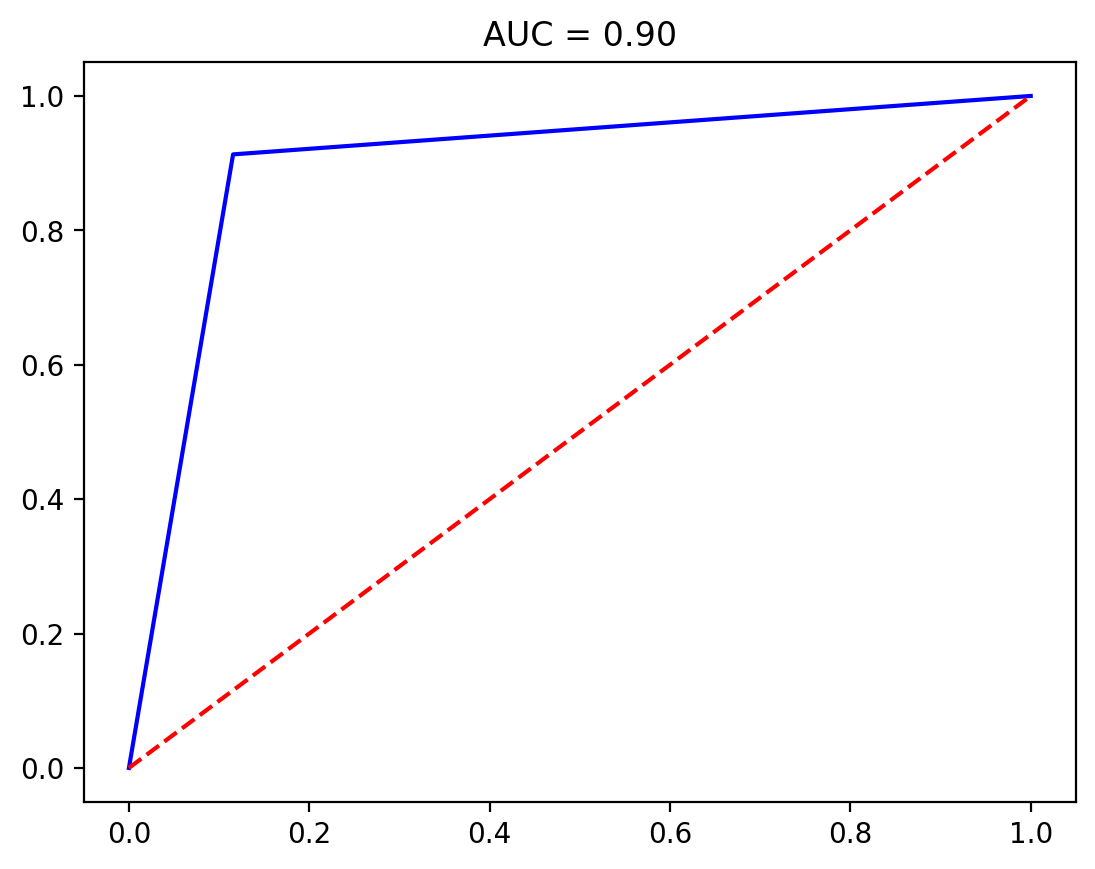

In [23]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [24]:
prob = classifier.predict_proba(x_test)

y_th = np.ones(len(y_test), dtype=bool)

for th in (0.7, 0.3):
    for i in range(len(y_test)):
        y_th[i] = prob[i][1] > th

    print('Precisión ', th, ':', accuracy_score(y_test, y_th))
    print('Exactitud ', th, ':', precision_score(y_test, y_th))
    print('Exhaustividad ', th, ':', recall_score(y_test, y_th))
    print

Precisión  0.7 : 0.9072
Exactitud  0.7 : 0.9489795918367347
Exhaustividad  0.7 : 0.8664596273291926
Precisión  0.3 : 0.88
Exactitud  0.3 : 0.8293333333333334
Exhaustividad  0.3 : 0.9658385093167702


## ARBOLES DE DECISIÓN

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy',
                                       random_state = 1).fit(x_train, y_train)
y_pred        = dt_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0


AUC: 1.0


Text(0.5, 1.0, 'AUC = 1.00')

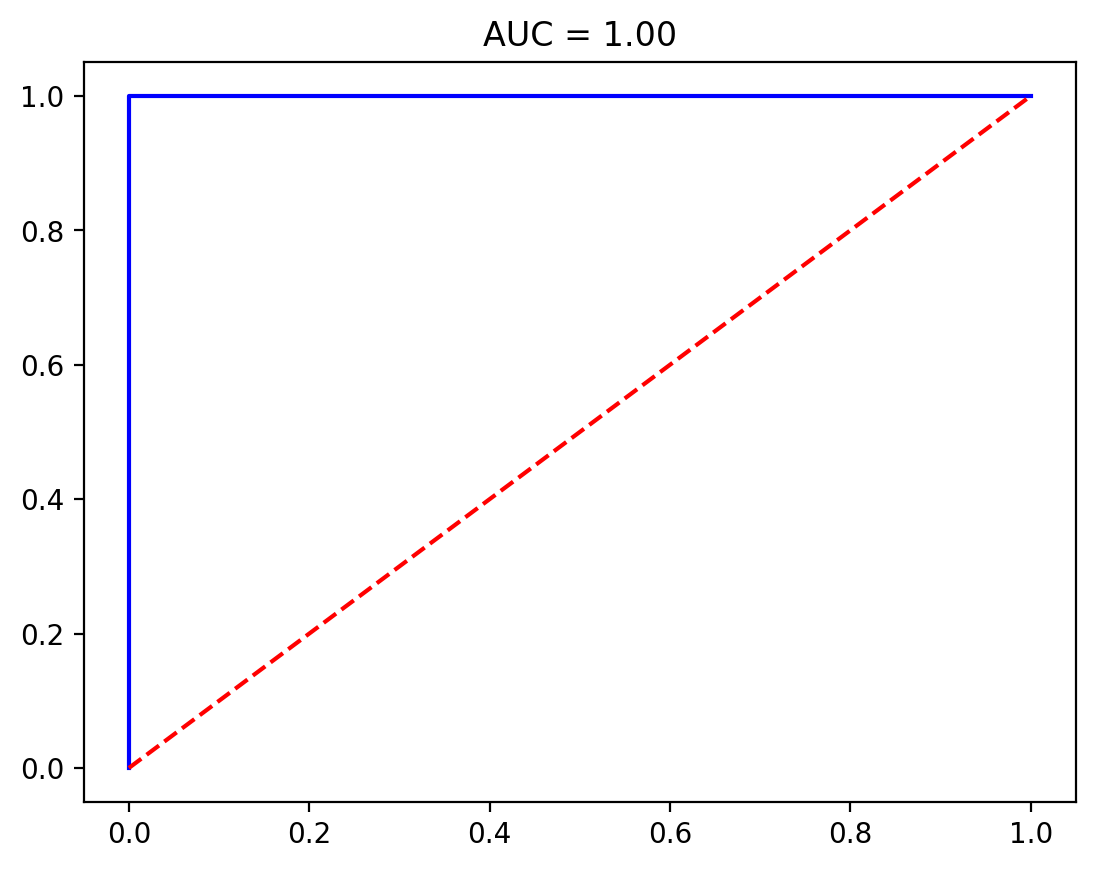

In [26]:
false_positive_rate, recall, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [27]:
y_pred     = dt_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.912
Exactitud: 0.908256880733945
Exhaustividad: 0.922360248447205


AUC: 0.911675173728553


Text(0.5, 1.0, 'AUC = 0.91')

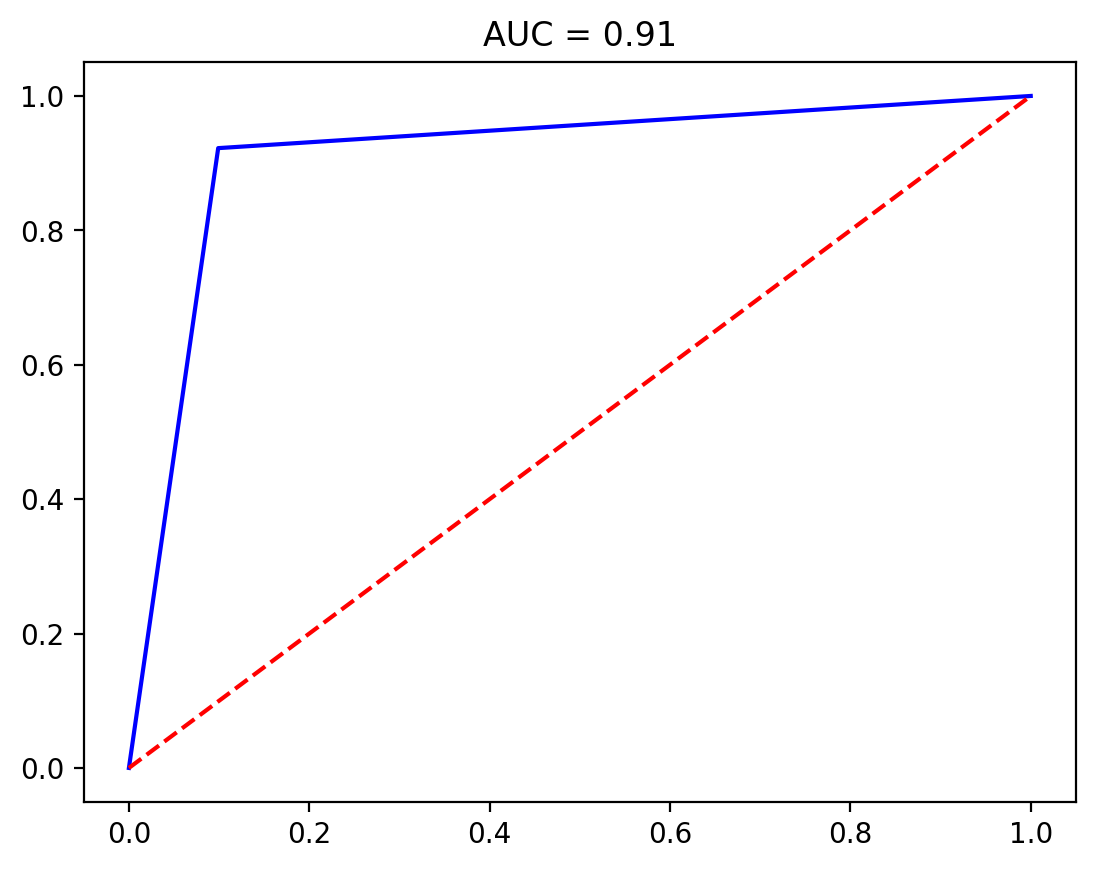

In [28]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [29]:
dt_classifier = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 1)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.9242666666666667
Exactitud: 0.9305402425578831
Exhaustividad: 0.914409534127844


AUC: 0.9241165317698044


Text(0.5, 1.0, 'AUC = 0.92')

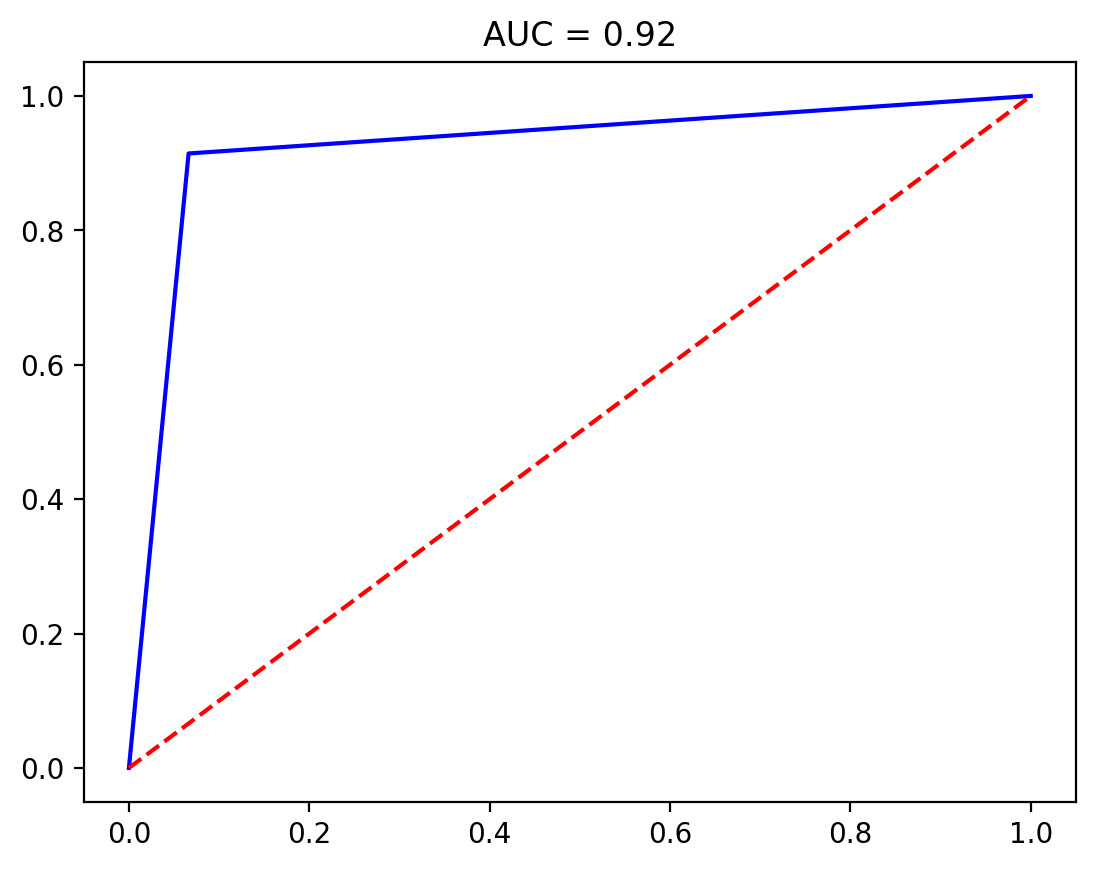

In [30]:
false_positive_rate, recall, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [31]:
y_pred     = dt_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.9024
Exactitud: 0.8918918918918919
Exhaustividad: 0.922360248447205


AUC: 0.9017741836295431


Text(0.5, 1.0, 'AUC = 0.90')

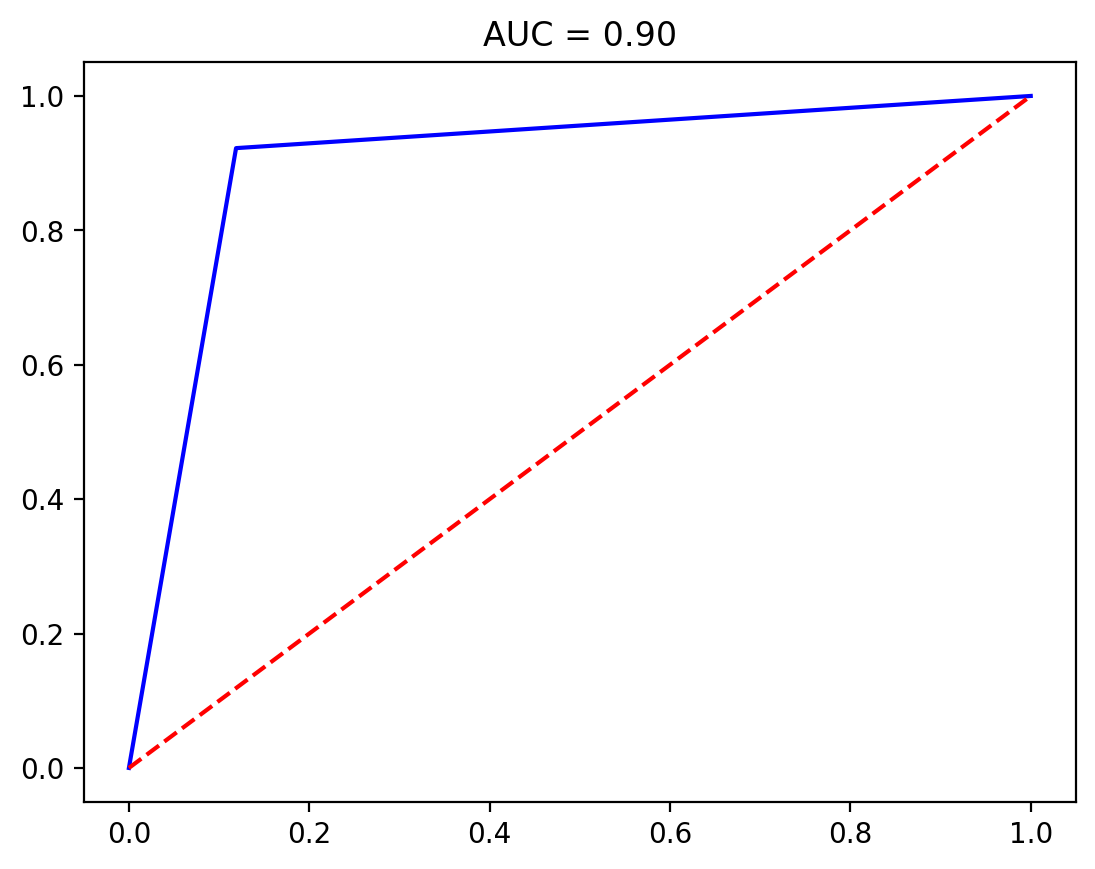

In [32]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [33]:
print(dt_classifier.feature_importances_)

[0.         0.83530293 0.16469707]


In [34]:
best_features = np.arange(len(dt_classifier.feature_importances_))
best_features = np.delete(best_features, np.argmin(dt_classifier.feature_importances_))

dt_classifier = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 1)
dt_classifier.fit(x_train[:, best_features], y_train)
y_pred        = dt_classifier.predict(x_train[:,best_features])

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.9242666666666667
Exactitud: 0.9305402425578831
Exhaustividad: 0.914409534127844


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 10,
                                       random_state = 1).fit(x_train, y_train)
y_pred        = rf_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.9904
Exactitud: 0.9934569247546347
Exhaustividad: 0.9869989165763814


In [36]:
y_pred     = rf_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.9168
Exactitud: 0.921875
Exhaustividad: 0.9161490683229814


In [37]:
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 10,
                                       max_depth = 4,
                                       random_state = 1)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.8928
Exactitud: 0.9267139479905437
Exhaustividad: 0.8494041170097508


In [38]:
y_pred     = rf_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.8752
Exactitud: 0.8961038961038961
Exhaustividad: 0.8571428571428571


## OTROS MODELOS SUPERVISADOS
### Maquinas de vector de soporte

In [39]:
from sklearn.svm import SVC

svm_classifier = SVC().fit(x_train, y_train)
y_pred         = svm_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.9152
Exactitud: 0.9072494669509595
Exhaustividad: 0.9219934994582882


In [40]:
y_pred     = svm_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.9184
Exactitud: 0.8973607038123167
Exhaustividad: 0.9503105590062112


AUC: 0.9173995039255478


Text(0.5, 1.0, 'AUC = 0.92')

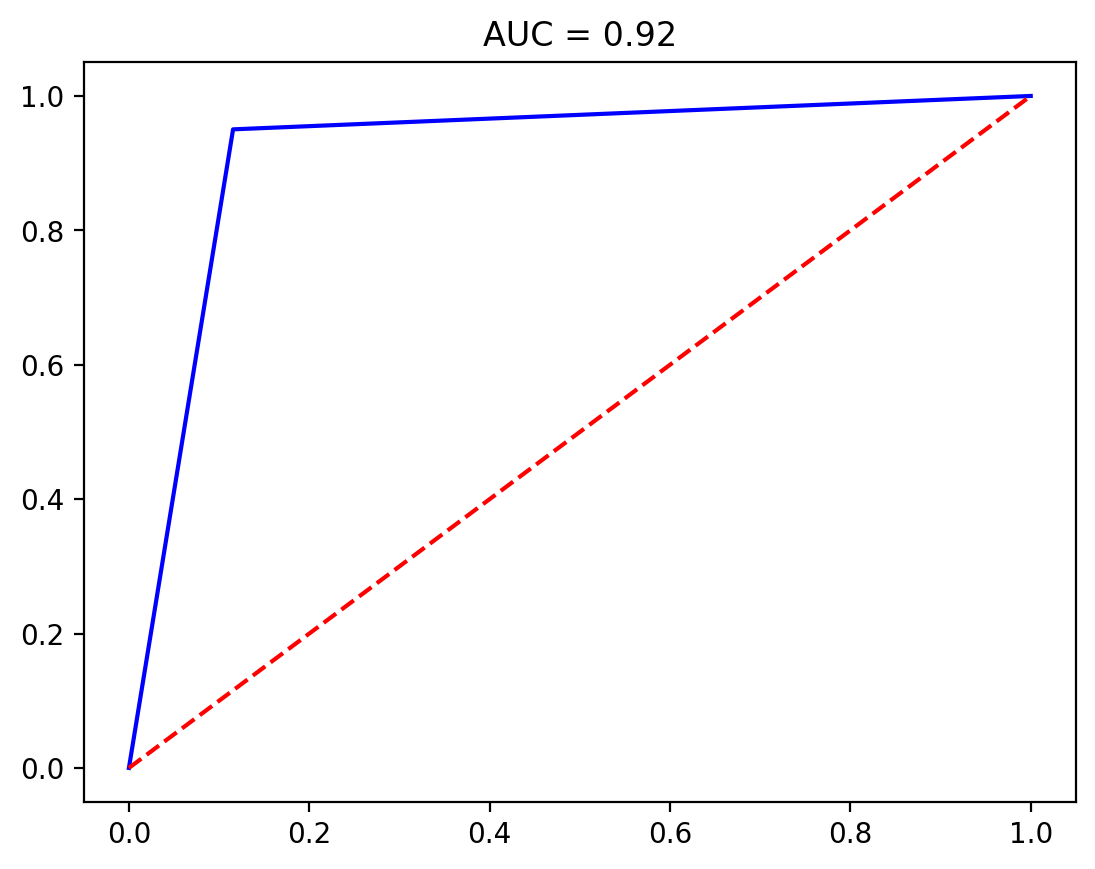

In [41]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

### Naïve Bayes


In [42]:
from sklearn import naive_bayes

nb_classifier = naive_bayes.GaussianNB().fit(x_train, y_train)
y_pred        = nb_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.8896
Exactitud: 0.8866090712742981
Exhaustividad: 0.8894907908992417


In [43]:
y_pred     = nb_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.8848
Exactitud: 0.8654970760233918
Exhaustividad: 0.9192546583850931


AUC: 0.8837197384334706


Text(0.5, 1.0, 'AUC = 0.88')

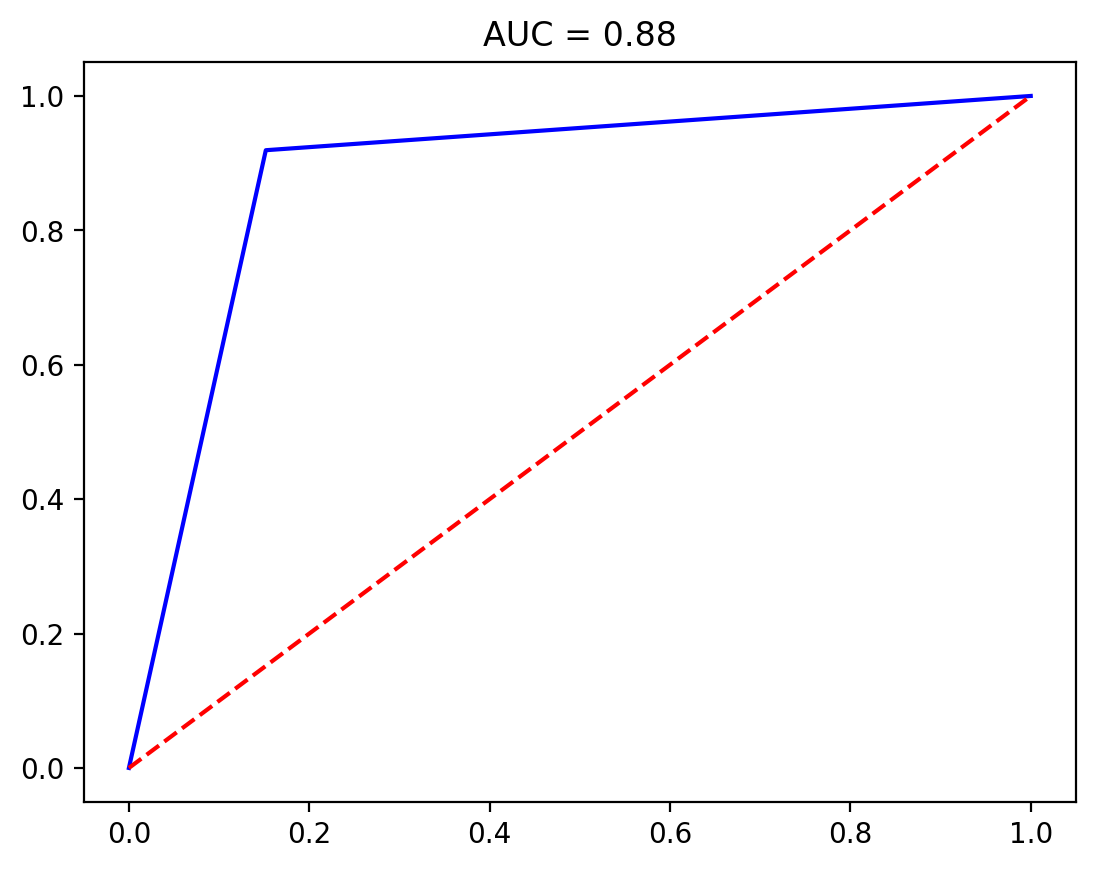

In [44]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Generar un conjunto de datos simulado
X, y = make_classification(
    n_samples=500, n_features=10, n_informative=5, n_redundant=0, random_state=42
)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# Predecir los resultados
y_pred = clf.predict(X_test)


[[-0.42472222 -0.46689062 -0.08507181 ... -0.62629142  1.48045349
  -0.20810408]
 [-1.04635487  2.2206838   1.14698337 ...  0.00882814 -1.99021503
   1.55797915]
 [ 0.39177652  0.58468328 -0.14027098 ... -0.37022559 -0.01726419
   0.71920925]
 ...
 [ 0.92001146 -0.65900676  2.04542249 ... -1.66447674 -1.93879009
   1.26803423]
 [ 0.82474901  2.07563754  0.73879695 ... -0.37227248  1.9988859
   0.62837316]
 [ 0.51999908  0.40156061  1.50111083 ...  0.46831558  0.13263904
   4.13630653]]


In [30]:
# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Exactitud: 0.91
Precisión: 0.91
Recall: 0.91
F1 Score: 0.91


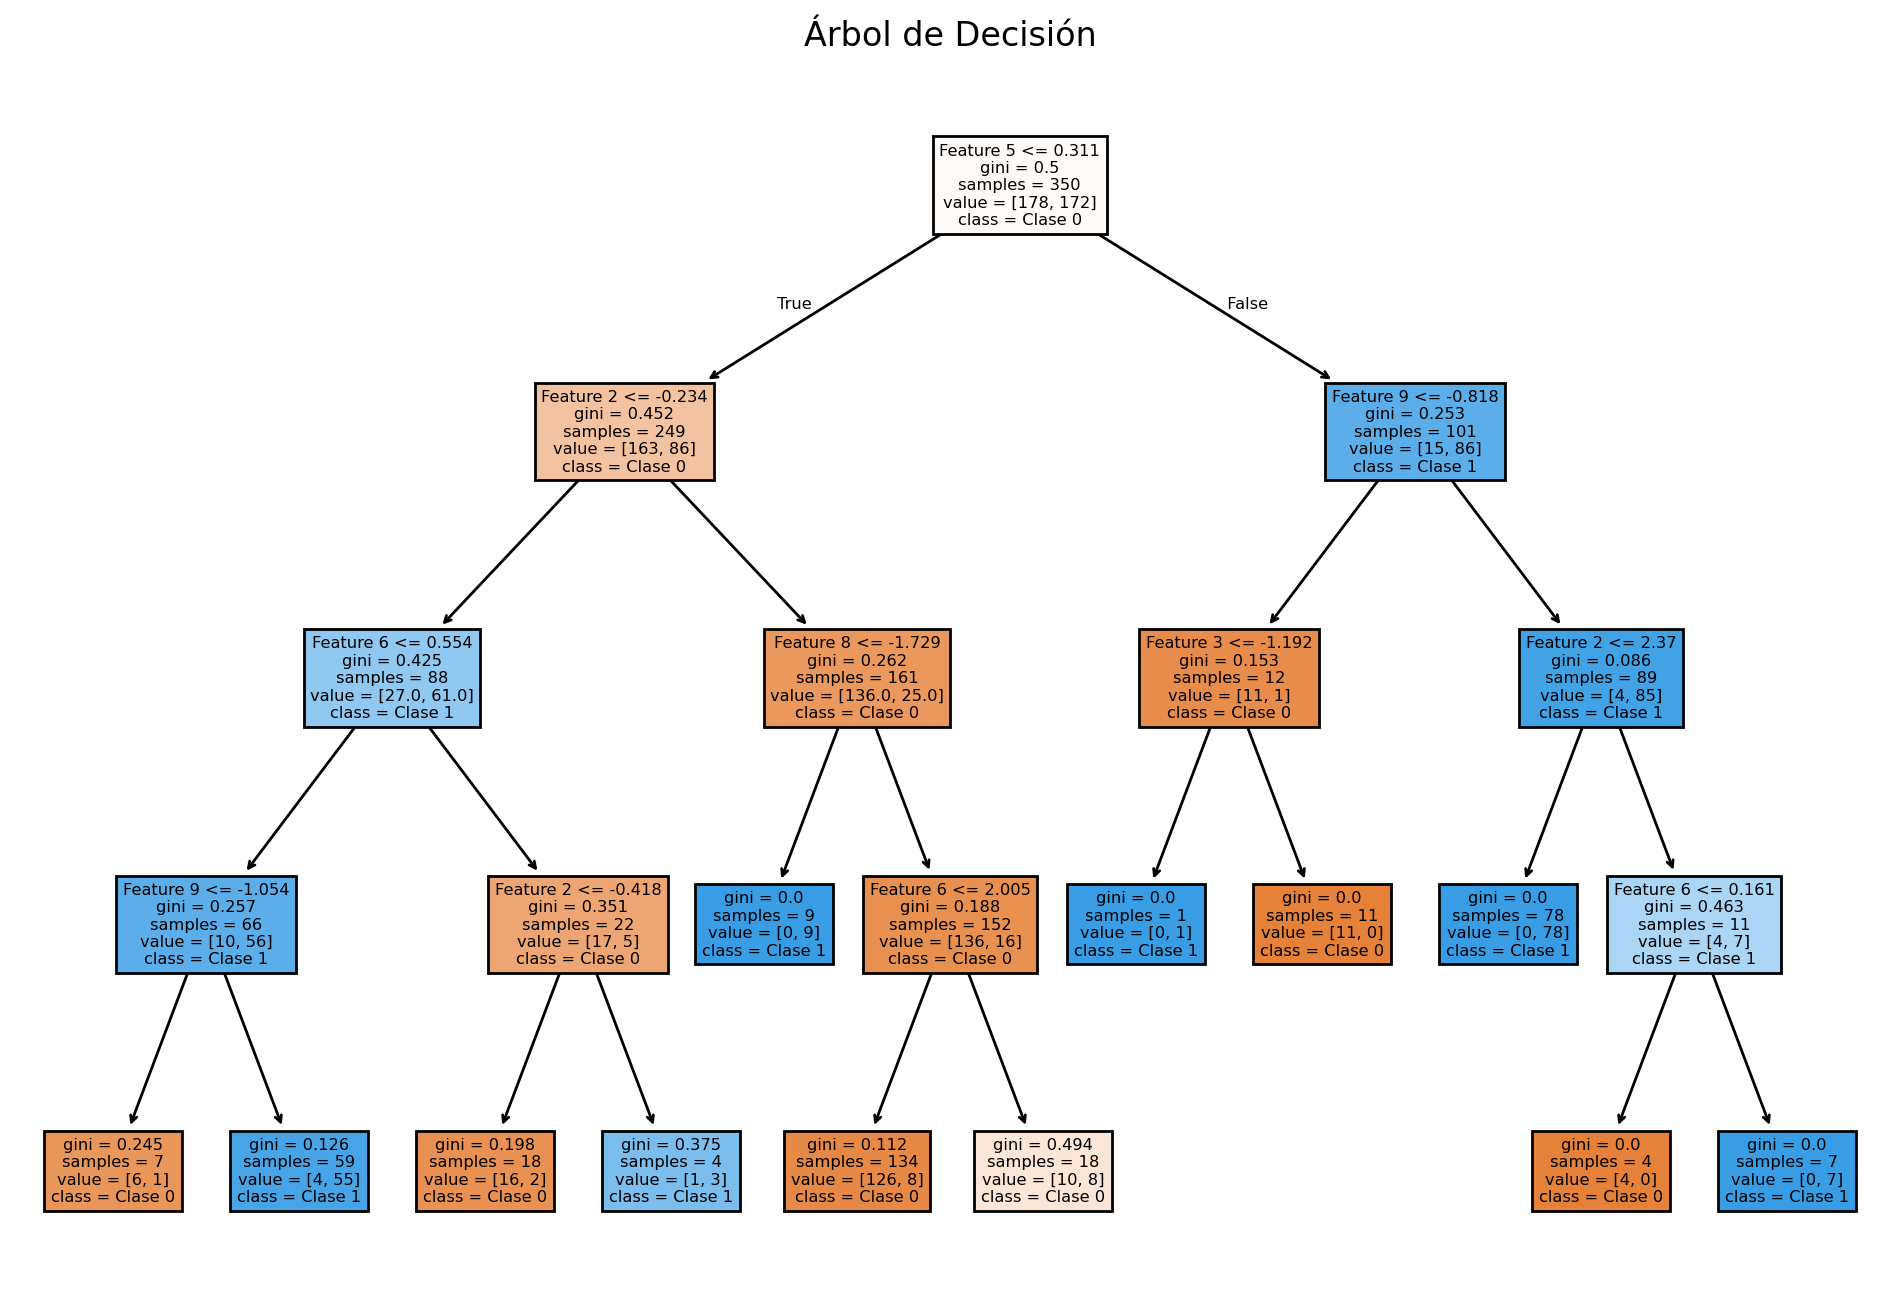

In [31]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=["Clase 0", "Clase 1"], filled=True)
plt.title("Árbol de Decisión")
plt.show()

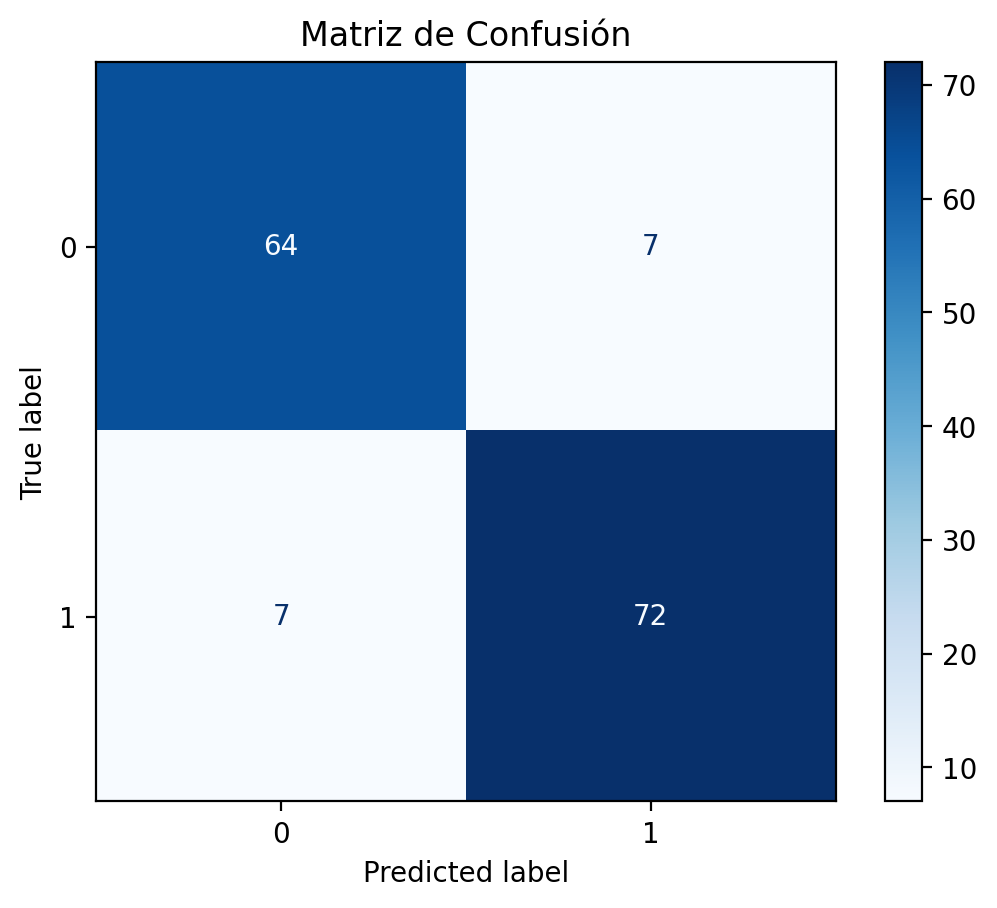

In [32]:
# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Ejemplo de Árbol de Decision para Deserción de Clientes
Se presenta el siguinete ejemplo que permite predecir la deserción a través de alguna variables principales como la Edad, Ingresos mensuales, Nivel educativo, Frecuencia de compra y Satisfación. Se desarrolla este ejercicio con un conjunto de datos simulado para poder ejemplificar la construcción de un modelo a través de árboles de decisión y la evaluación de los principlaes indicadores.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# Generar conjunto de datos simulado
X, y = make_classification(
    n_samples=500, n_features=5, n_informative=3, n_redundant=0, random_state=42,
    class_sep=1.5
)

# Asignar nombres reales a las características
feature_names = ["Edad", "Ingresos mensuales", "Nivel educativo", "Frecuencia de compra", "Satisfacción"]
df = pd.DataFrame(X, columns=feature_names)

# Transformar las características a valores realistas
df['Edad'] = (df['Edad'] - df['Edad'].min()) / (df['Edad'].max() - df['Edad'].min()) * (70 - 18) + 18  # Edad entre 18 y 70 años
df['Edad'] = df['Edad'].round()

df['Ingresos mensuales'] = (df['Ingresos mensuales'] - df['Ingresos mensuales'].min()) / (df['Ingresos mensuales'].max() - df['Ingresos mensuales'].min()) * 8000 + 1000  # Ingresos entre 1,000 y 8,000 USD
df['Ingresos mensuales'] = df['Ingresos mensuales'].round(2)

df['Nivel educativo'] = pd.cut(df['Nivel educativo'], bins=3, labels=["Básico", "Secundario", "Universitario"])  # Categórico: Básico, Secundario, Universitario

# Convertir 'Nivel educativo' en una variable numérica ordenada
educational_mapping = {"Básico": 1, "Secundario": 2, "Universitario": 3}
df['Nivel educativo'] = df['Nivel educativo'].map(educational_mapping)

df['Frecuencia de compra'] = (df['Frecuencia de compra'] - df['Frecuencia de compra'].min()) / (df['Frecuencia de compra'].max() - df['Frecuencia de compra'].min()) * 20  # Compras entre 0 y 20 al mes
df['Frecuencia de compra'] = df['Frecuencia de compra'].round().astype(int)

df['Satisfacción'] = (df['Satisfacción'] - df['Satisfacción'].min()) / (df['Satisfacción'].max() - df['Satisfacción'].min()) * 10  # Satisfacción en escala de 1 a 10
df['Satisfacción'] = df['Satisfacción'].round()

# Agregar la columna de clase
df['Clase'] = y

# Dividir en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names], df['Clase'], test_size=0.4, random_state=42
)

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predecir los resultados
y_pred = tree_model.predict(X_test)
y_pred_train= tree_model.predict(X_train)


En el código anterior no solo se genera el modelo de clasificación de árbol si no se divide al conjunto de datos en entrenamiento y test. Es importante tomar en cuenta que es bueno tener una muestra de netrenamiento de al menos el 70% de los datos. Importante mencionar que la muestra de entrenamiento nos permitirá construir el modelo, mientras que la de test permite la probar si los indicadires se mantiene y si el modelo en una muestra independiente a la de construcción tendra la misma validez. De igual forma en código que sigue damos un vistazo a los datos generados.

In [65]:
# Mostrar los primeros registros
print(df.head())

   Edad  Ingresos mensuales Nivel educativo  Frecuencia de compra  \
0  27.0             4469.98               2                    11   
1  45.0             5541.71               2                     7   
2  31.0             5558.66               2                    10   
3  34.0             5321.38               3                    15   
4  40.0             6584.19               2                    10   

   Satisfacción  Clase  
0           5.0      0  
1           8.0      1  
2           3.0      1  
3           9.0      1  
4           3.0      1  


In [75]:
# Calcular métricas de rendimiento en Entrenamiento
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

# Imprimir las métricas
print("Indicadores principales de rendimiento:")
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Indicadores principales de rendimiento:
Exactitud: 1.00
Precisión: 1.00
Recall: 1.00
F1 Score: 1.00


In [76]:
# Calcular métricas de rendimiento en Test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Indicadores principales de rendimiento:")
print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Indicadores principales de rendimiento:
Exactitud: 0.95
Precisión: 0.95
Recall: 0.96
F1 Score: 0.96


Con base en los resultados anteriores vemos que los indicadores se mantienen, pero nos llama la atención que la claramente caen los indicadores principales, por lo que ya en la evaluación de una muestra independiente podríamos decir que el modelo calsificará un 96% de clientes de forma adecuada. De igual forma podemos ver como se ha generado el árbol y los cortes en las variables principales.

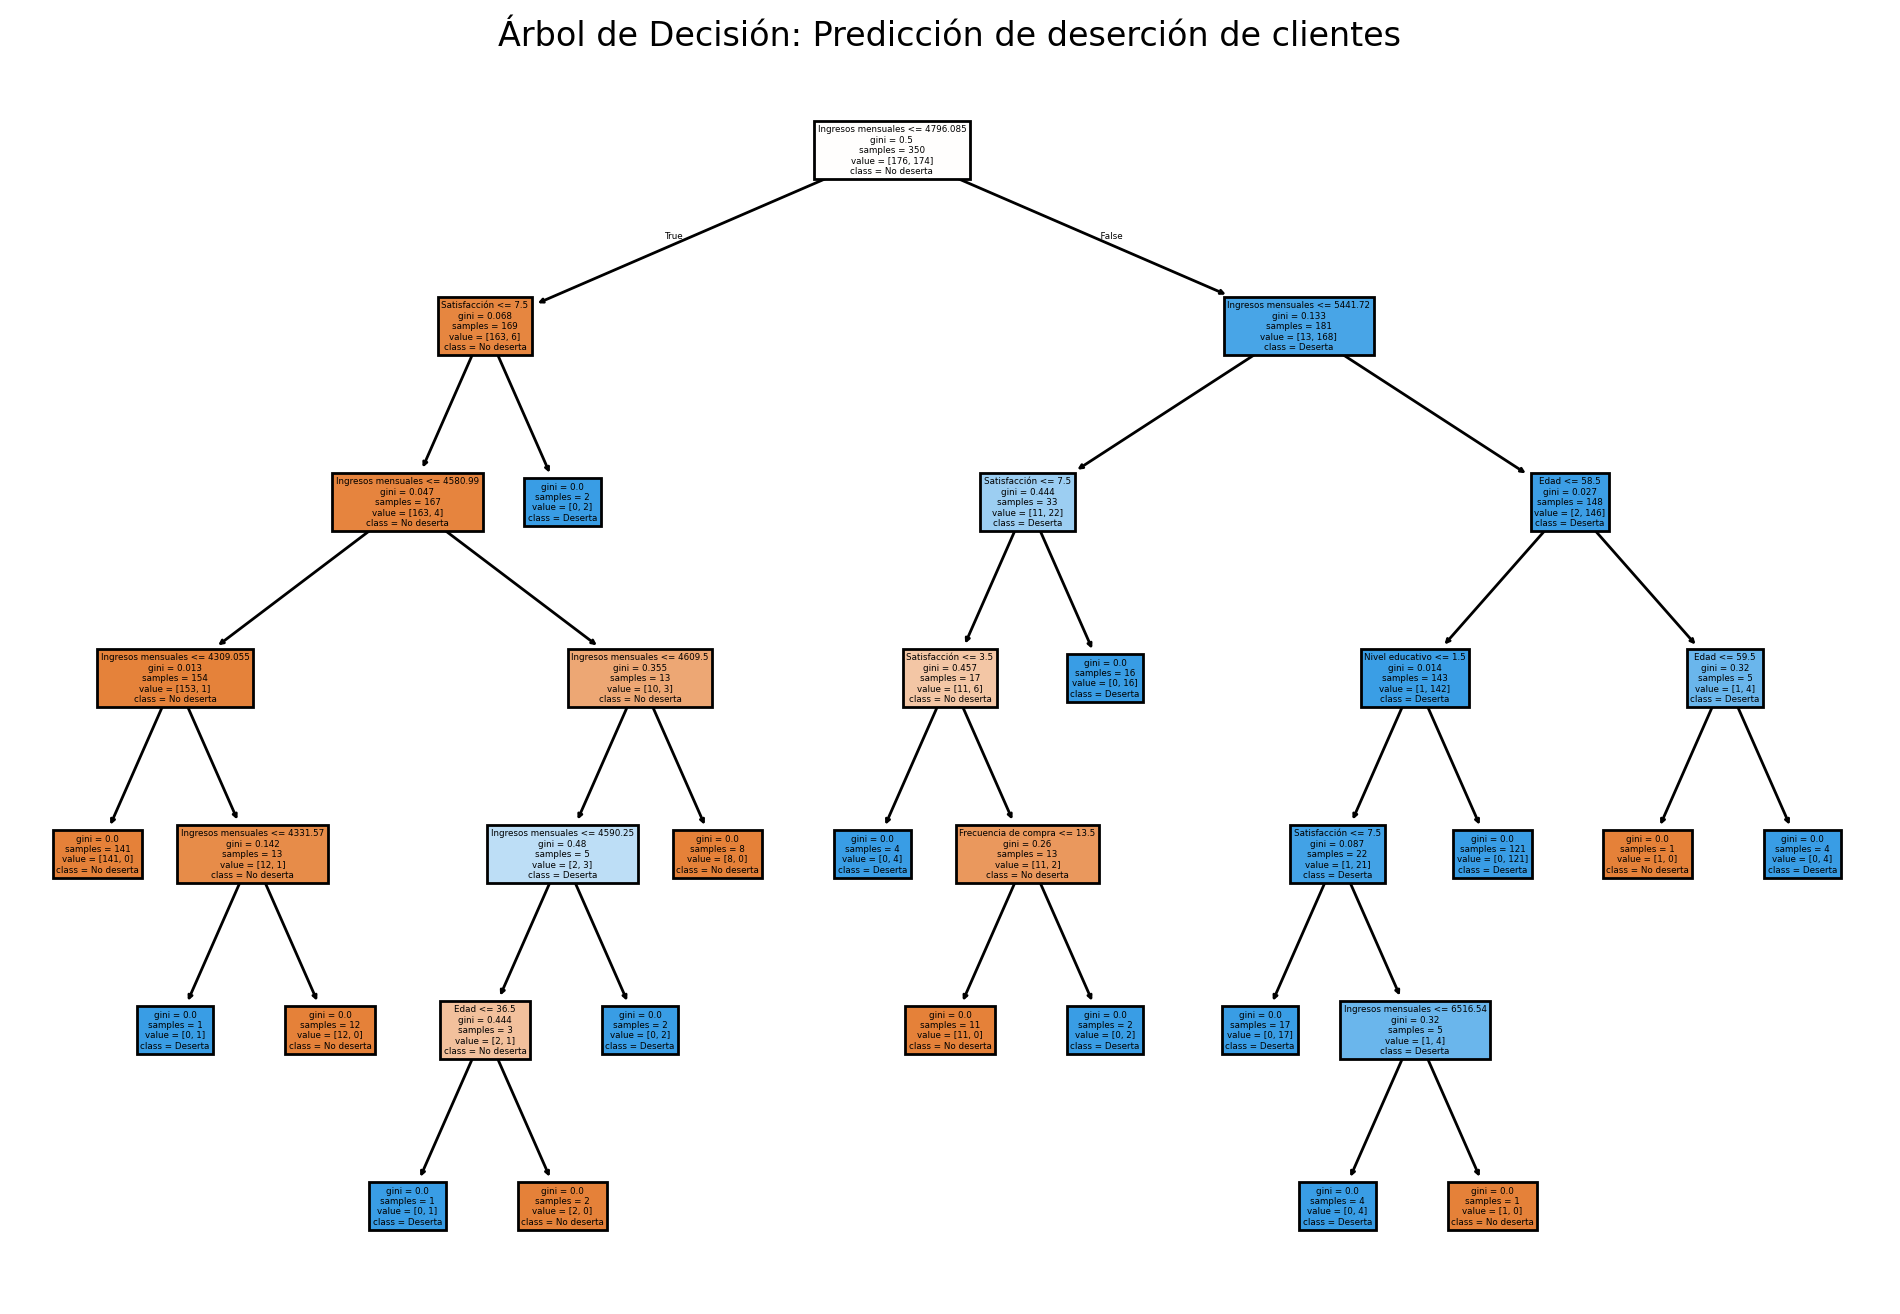

In [69]:

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=feature_names, class_names=["No deserta", "Deserta"], filled=True)
plt.title("Árbol de Decisión: Predicción de deserción de clientes")
plt.show()


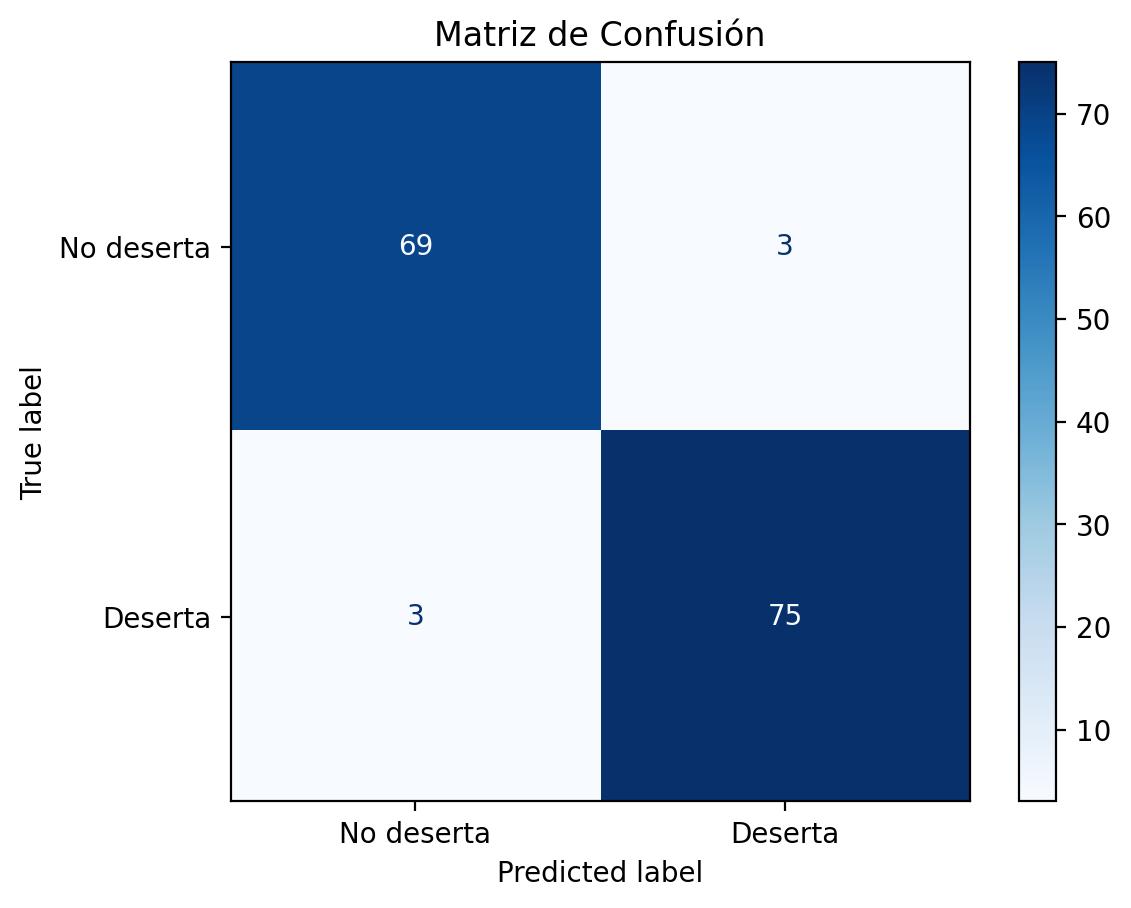

In [70]:
# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No deserta", "Deserta"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

AUC: 0.9599358974358976


Text(0.5, 1.0, 'AUC = 0.96')

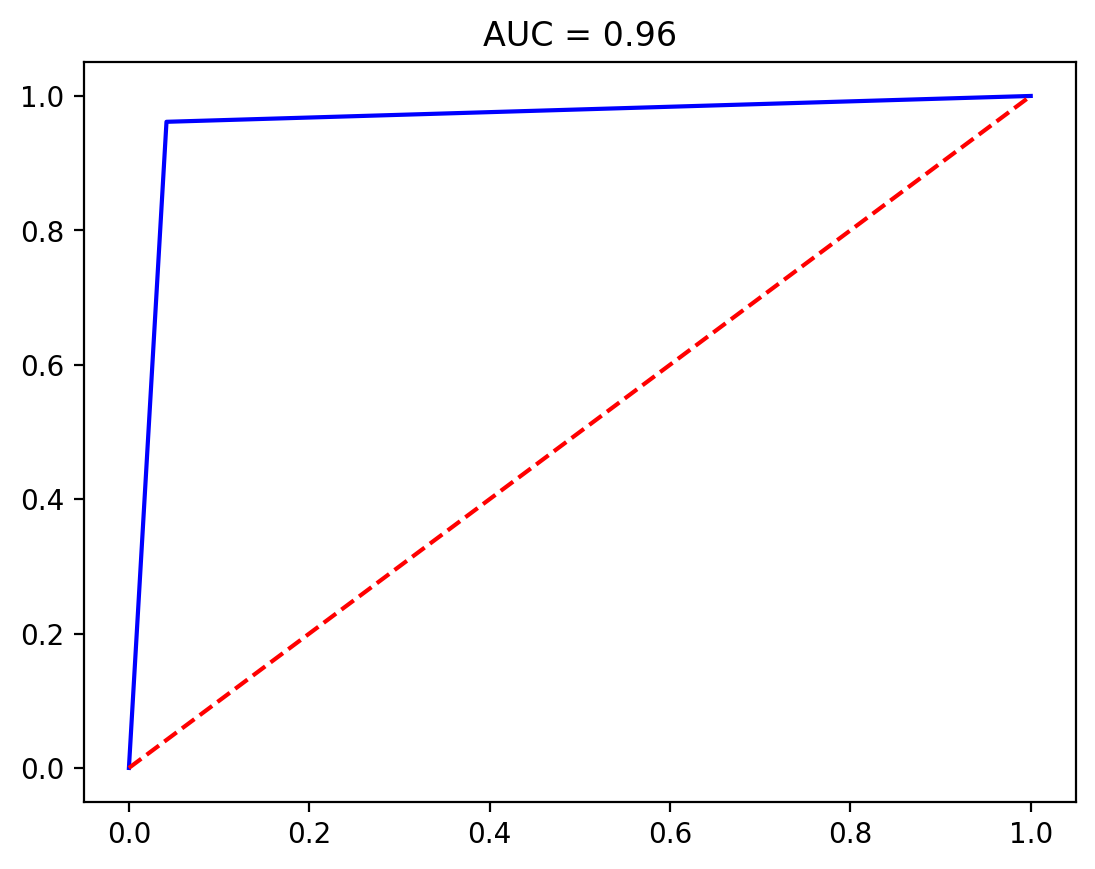

In [71]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)